In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.sparse import csr_matrix
from scipy.spatial import distance
import os
import warnings; warnings.simplefilter('ignore')
import anndata
import scrublet as scr

import seaborn as sns
sns.set_style('white')

np.random.seed(0)
sc.settings.verbosity = 3 

In [2]:
sc.logging.print_versions()

scanpy==1.4.5 anndata==0.7.5 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
sc.set_figure_params(scanpy=True, dpi=80)

In [4]:
adata = sc.read('veatch_cd4_orig4.h5ad')

### S4A

In [5]:
sc.tl.pca(adata, random_state = 1010,svd_solver='arpack',use_highly_variable=False)
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=20, random_state = 1010)
sc.tl.umap(adata, random_state = 1010, min_dist=0.2)
sc.tl.leiden(adata, resolution=0.7, random_state = 1010)

computing PCA with n_comps = 50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 20


/Users/cshasha/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:104: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


In [6]:
adata.obs['antigen_patient'] = 'nan'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'neoantigen') & (adata.obs['patient'] == 'X197')] = 'X197 neoantigen'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'neoantigen') & (adata.obs['patient'] == 'X198')] = 'X198 neoantigen'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'neoantigen') & (adata.obs['patient'] == 'X205')] = 'X205 neoantigen'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'neoantigen') & (adata.obs['patient'] == 'X422')] = 'X422 neoantigen'

adata.obs['antigen_patient'][(adata.obs['antigen'] == 'self') & (adata.obs['patient'] == 'X197')] = 'X197 self'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'self') & (adata.obs['patient'] == 'X198')] = 'X198 self'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'self') & (adata.obs['patient'] == 'X205')] = 'X205 self'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'self') & (adata.obs['patient'] == 'X422')] = 'X422 self'

adata.obs['antigen_patient'][(adata.obs['antigen'] == 'viral') & (adata.obs['patient'] == 'X197')] = 'X197 viral'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'viral') & (adata.obs['patient'] == 'X198')] = 'X198 viral'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'viral') & (adata.obs['patient'] == 'X205')] = 'X205 viral'
adata.obs['antigen_patient'][(adata.obs['antigen'] == 'viral') & (adata.obs['patient'] == 'X422')] = 'X422 viral'

In [7]:
cmap = sns.color_palette("Set1", 7) + ['lightgrey']

... storing 'antigen_patient' as categorical
/Users/cshasha/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:4204: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  (isinstance(c, collections.Iterable) and


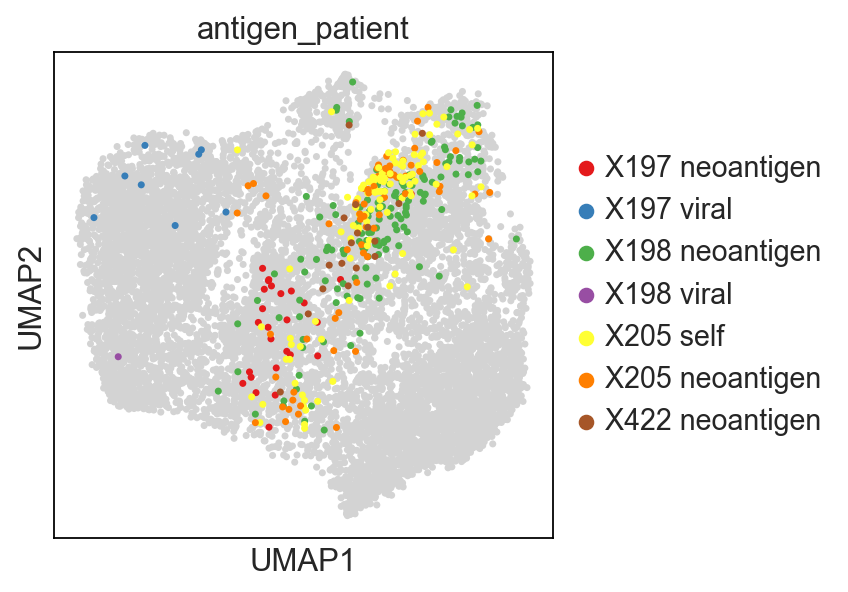

In [8]:
sc.pl.umap(adata, color='antigen_patient',
           palette=cmap,groups=['X197 neoantigen', 'X197 viral', 'X198 neoantigen', 'X198 viral', 'X205 self', 'X205 neoantigen', 'X422 neoantigen'],
           alpha = 1, s=40)

### S4B

In [11]:
ab = ['CD127 (ab)', 'CXCR5 (ab)','CD103 (ab)', 'Tim3 (ab)']

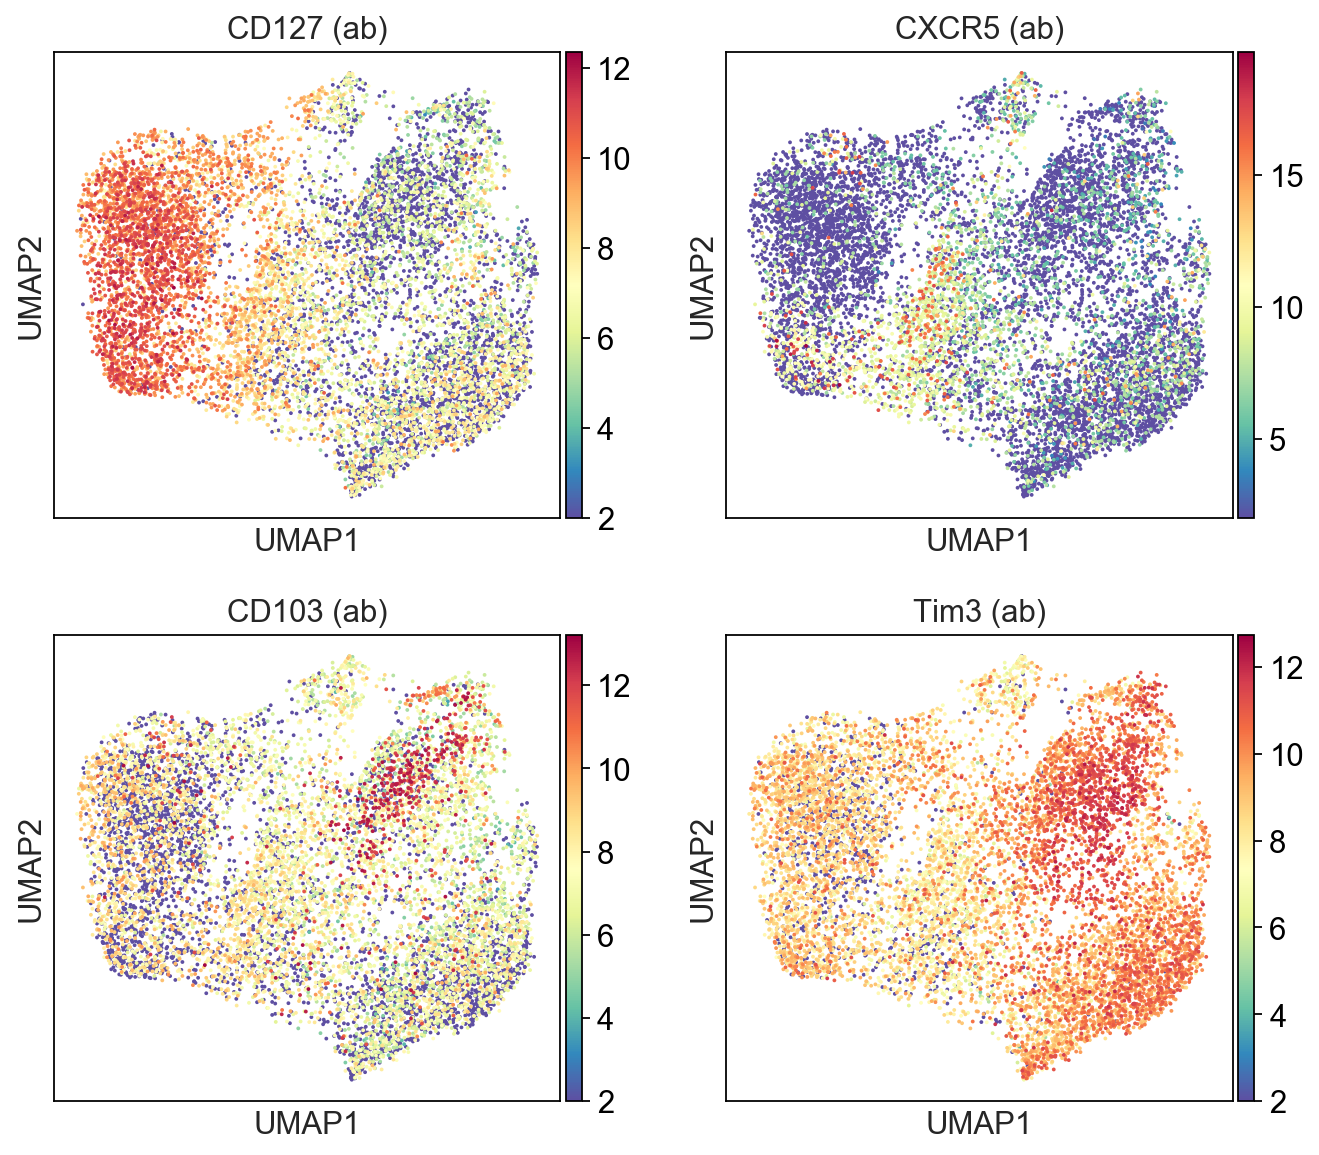

In [12]:
sc.pl.umap(adata, color=ab,vmin=2,
           alpha = 1,use_raw=False,ncols=2,cmap='Spectral_r')

### S4C

In [13]:
adata.obs['labels'] = adata.obs['leiden'].astype('object')
adata.obs['labels'][adata.obs['leiden'] == '0'] = 'Treg'
adata.obs['labels'][adata.obs['leiden'] == '1'] = 'CXCL13-'
adata.obs['labels'][adata.obs['leiden'] == '4'] = 'CXCL13-'
adata.obs['labels'][adata.obs['leiden'] == '2'] = 'CXCL13+, TCF7+'
adata.obs['labels'][adata.obs['leiden'] == '3'] = 'CXCL13+, TCF7-'
adata.obs['labels'][adata.obs['leiden'] == '5'] = 'Proliferating'

In [15]:
import scirpy as ir

In [17]:
adata.obs['clonotype'] = adata.obs['TCR_Beta_Delta_CDR3_Nucleotide_Dominant']

In [18]:
adata = adata[adata.obs['clonotype'] != 'nan']

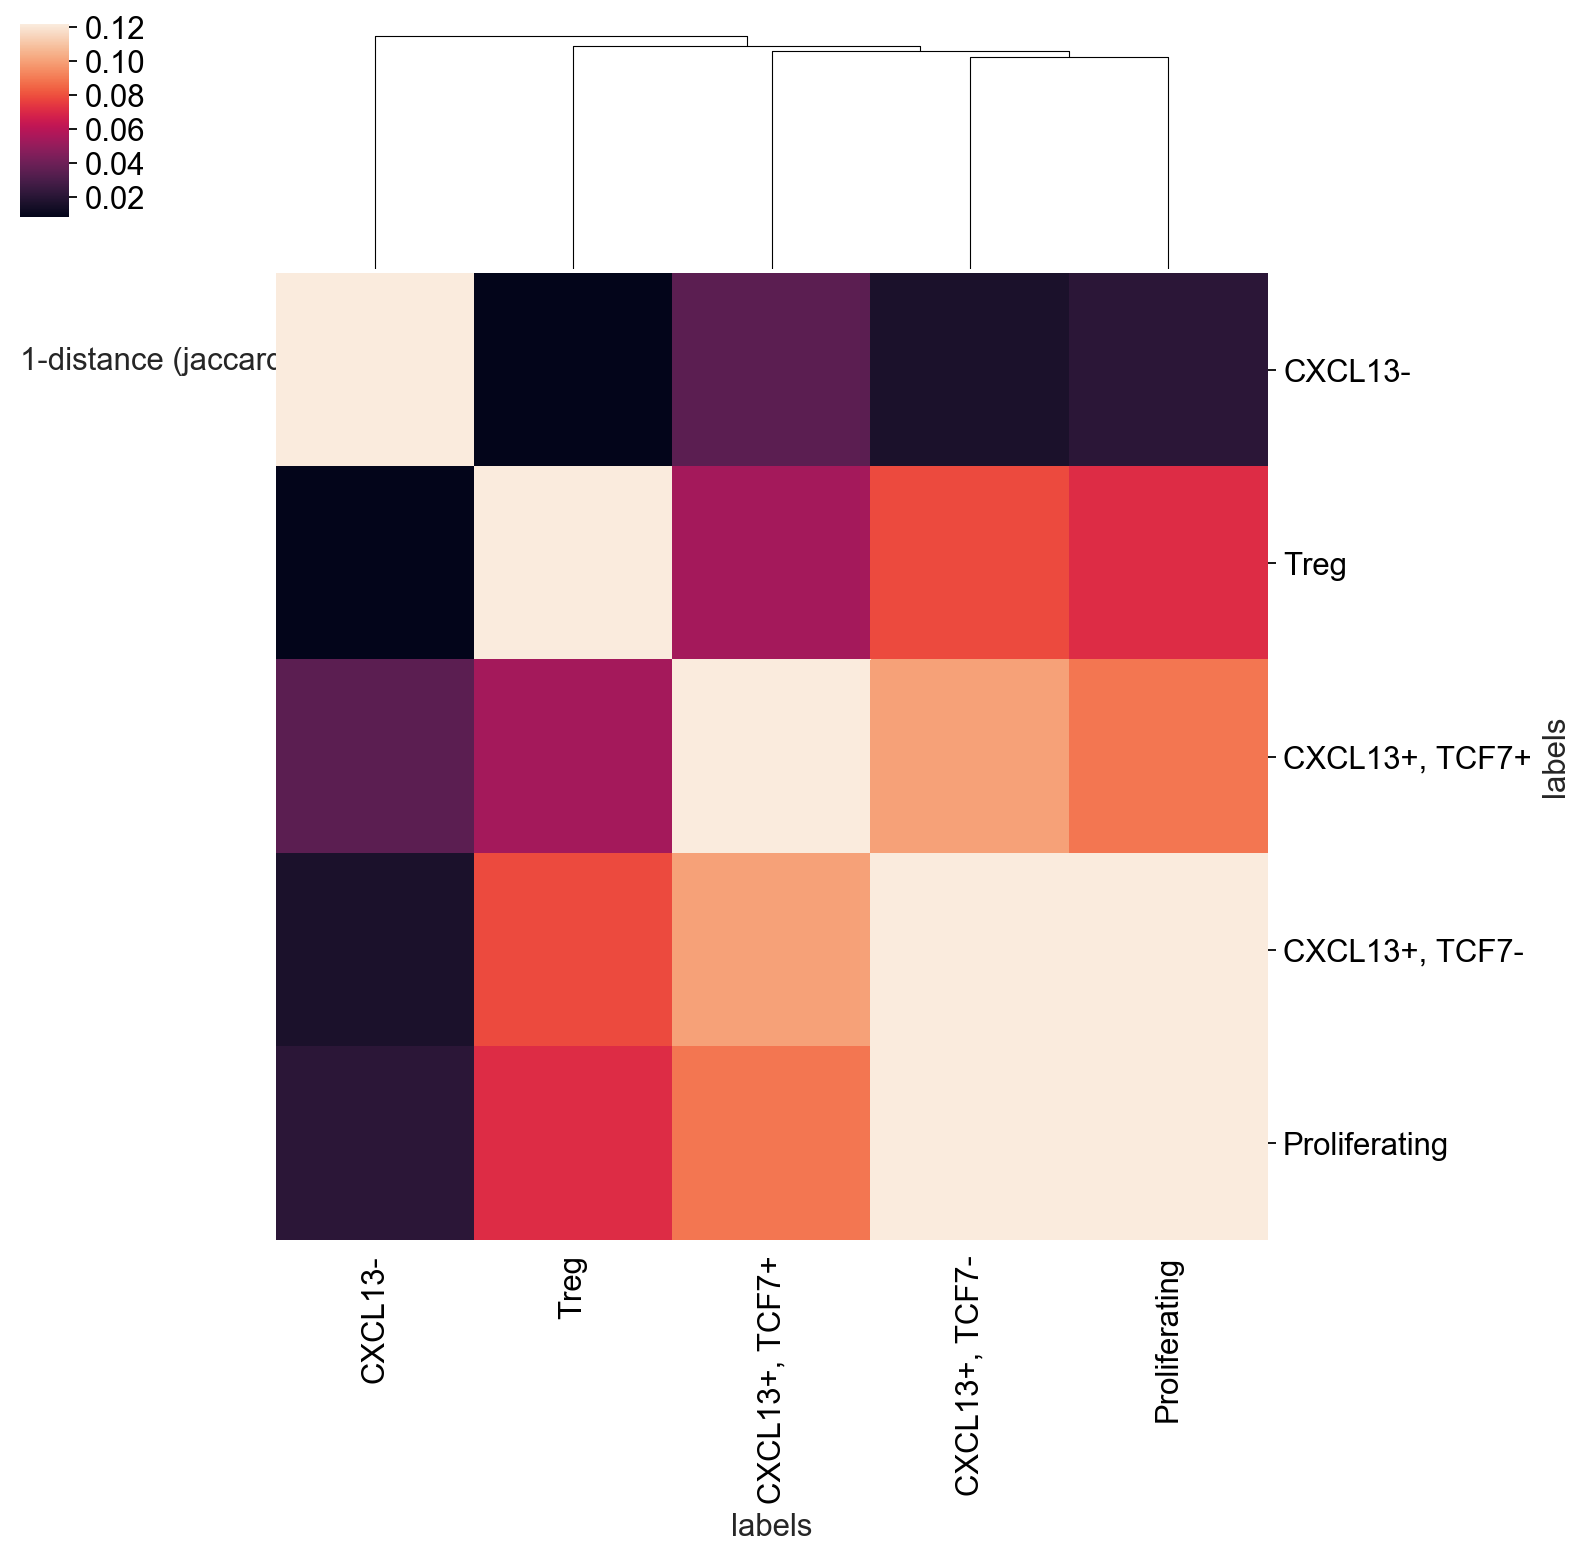

In [20]:
ir.tl.repertoire_overlap(adata, "labels", fraction='labels')
ir.pl.repertoire_overlap(adata, "labels",fraction='labels')

### S4D

In [21]:
adata.obs[['TCR_Beta_Delta_CDR3_Nucleotide_Dominant','CD4_neo_antigen','patient']][(adata.obs['TCR_Beta_Delta_CDR3_Nucleotide_Dominant'] == 'AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC') & (adata.obs['antigen'] != 'nan')]

,TCR_Beta_Delta_CDR3_Nucleotide_Dominant,CD4_neo_antigen,patient
50653-1,AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC,ERAP1,X198
580018-1,AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC,ERAP1,X198
42505-1,AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC,ERAP1,X198
444453-1,AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC,ERAP1,X198
350157-1,AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC,ERAP1,X198
...,...,...,...
274175-1,AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC,ERAP1,X198
662491-1,AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC,ERAP1,X198
711556-1,AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC,ERAP1,X198
326306-1,AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC,ERAP1,X198


In [22]:
c1 = 'AGTGCTAGCCCCCGGGGCGCATCCTACAATGAGCAGTTC' 

... storing 'top_clonotype' as categorical


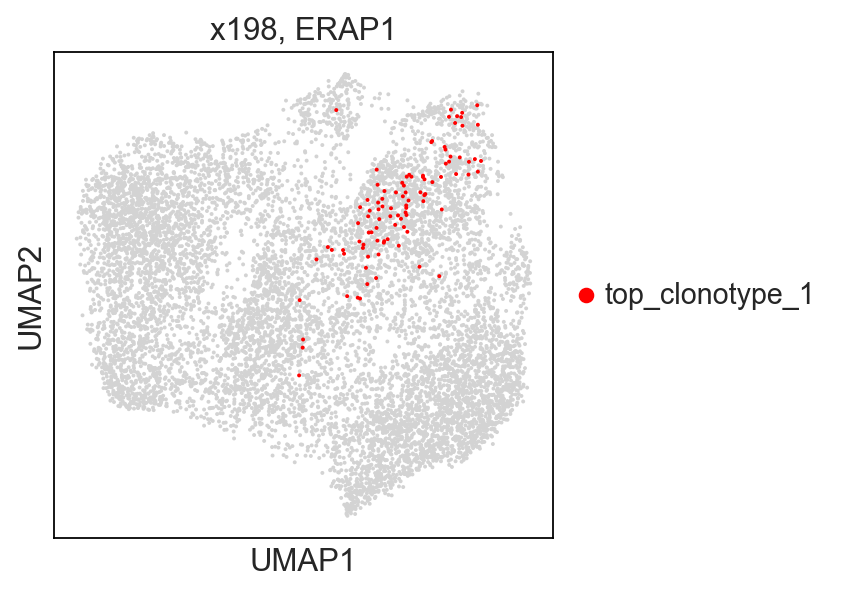

In [24]:
pal = ['lightgrey'] + ['red']
adata.obs['top_clonotype'] = 'nan'
adata.obs['top_clonotype'][adata.obs['TCR_Beta_Delta_CDR3_Nucleotide_Dominant'] == c1] = 'top_clonotype_1'
sc.pl.umap(adata, color='top_clonotype',groups='top_clonotype_1',palette=pal,title='x198, ERAP1')

In [25]:
c2 = 'GCCACCAGCAGAGCGCAGGGCGAGCAGTAC'

... storing 'top_clonotype' as categorical


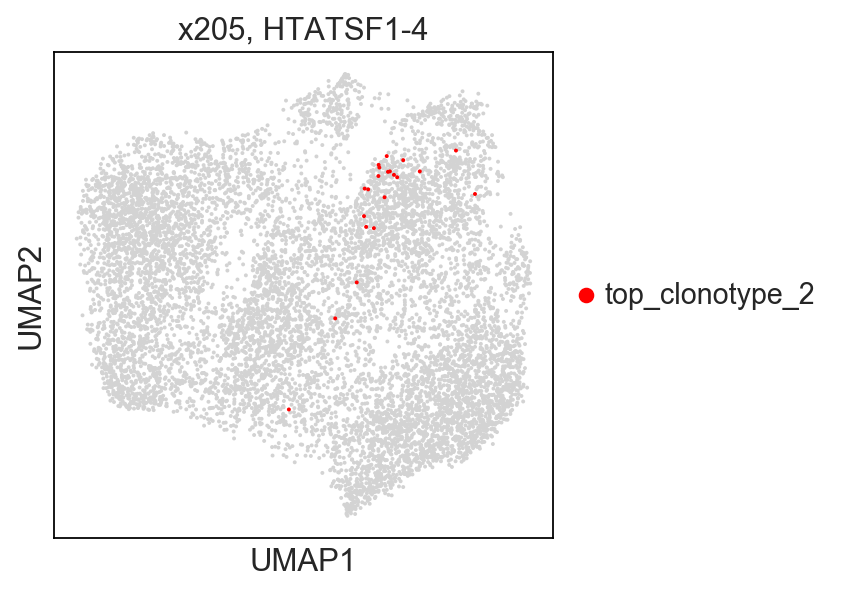

In [26]:
pal = ['lightgrey'] + ['red']
adata.obs['top_clonotype'] = 'nan'
adata.obs['top_clonotype'][adata.obs['TCR_Beta_Delta_CDR3_Nucleotide_Dominant'] == c2] = 'top_clonotype_2'
sc.pl.umap(adata, color='top_clonotype',groups='top_clonotype_2',palette=pal,title='x205, HTATSF1-4')